In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Heart Disease.csv')
df = df.dropna()

In [3]:
# features in X, labels in y
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

#  70:15:15 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# size check
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")



X_train shape: (2559, 15)
y_train shape: (2559,)
X_val shape: (548, 15)
y_val shape: (548,)


In [4]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def loss(y, p):
    # Cross-entropy loss
    noise = 0.000000000000001
    return -np.mean(y * np.log(p + noise) + (1 - y) * np.log(1 - p + noise))


def gradients(X, y, p):
    m = X.shape[0]
    dw = (1/m) * np.dot(X.T, (p-y)) 
    dw = dw.reshape(-1, 1) 
    db = (1/m) * np.sum(p-y)
    return dw, db


### logistic regression
- Learning rate - small value
- Epochs - 1000

1. z = w^T * X + b
2. Apply sigmoid function
3. cross entropy loss
4. gradient
5. update weights
6. repeat

In [5]:
import random
def logistic_regression_batch_gradient_descent(X_train, y_train, X_val, y_val, learning_rate, epochs):
    m, n = X_train.shape
    # w = np.zeros((n, 1))
    np.random.seed(420)
    w = np.random.randn(n, 1) * 0.1
    b = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        z_train = np.dot(X_train, w) + b
        p_train = sigmoid(z_train.flatten())
        
        z_val = np.dot(X_val, w) + b
        p_val = sigmoid(z_val.flatten())
        
        # loss
        train_loss = loss(y_train, p_train)
        val_loss = loss(y_val, p_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    
        # accuracy
        train_accuracy = np.mean((p_train > 0.5).astype(int) == y_train.to_numpy()) * 100
        val_accuracy = np.mean((p_val > 0.5).astype(int) == y_val.to_numpy()) * 100
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        # update
        dw, db = gradients(X_train, y_train.to_numpy(), p_train)
        w -= learning_rate * dw 
        b -= learning_rate * db

        
        if (epoch % 50) == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
            

    return w, b, train_losses, val_losses, train_accuracies, val_accuracies

In [6]:
def min_max_scaling(X):
    return (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))

In [7]:
# w/o scaling
w_no_scale,b_no_scale,train_losses_no_scale,val_losses_no_scale,train_accuracies_no_scale,val_accuracies_no_scale = logistic_regression_batch_gradient_descent(X_train,y_train,X_val,y_val,0.0001,2000)

Epoch 0, Train Loss: 3.3030, Train Accuracy: 47.05%, Val Loss: 3.6348, Val Accuracy: 46.53%
Epoch 50, Train Loss: 1.5869, Train Accuracy: 77.61%, Val Loss: 1.7359, Val Accuracy: 73.36%
Epoch 100, Train Loss: 1.3821, Train Accuracy: 77.92%, Val Loss: 1.5139, Val Accuracy: 73.72%
Epoch 150, Train Loss: 1.1941, Train Accuracy: 78.08%, Val Loss: 1.3132, Val Accuracy: 74.64%
Epoch 200, Train Loss: 1.0293, Train Accuracy: 78.31%, Val Loss: 1.1368, Val Accuracy: 75.73%
Epoch 250, Train Loss: 0.8919, Train Accuracy: 78.27%, Val Loss: 0.9897, Val Accuracy: 76.64%
Epoch 300, Train Loss: 0.7845, Train Accuracy: 79.21%, Val Loss: 0.8751, Val Accuracy: 77.01%
Epoch 350, Train Loss: 0.7069, Train Accuracy: 80.30%, Val Loss: 0.7922, Val Accuracy: 78.65%
Epoch 400, Train Loss: 0.6544, Train Accuracy: 80.89%, Val Loss: 0.7352, Val Accuracy: 78.47%
Epoch 450, Train Loss: 0.6194, Train Accuracy: 81.20%, Val Loss: 0.6965, Val Accuracy: 78.65%
Epoch 500, Train Loss: 0.5953, Train Accuracy: 81.32%, Val Loss

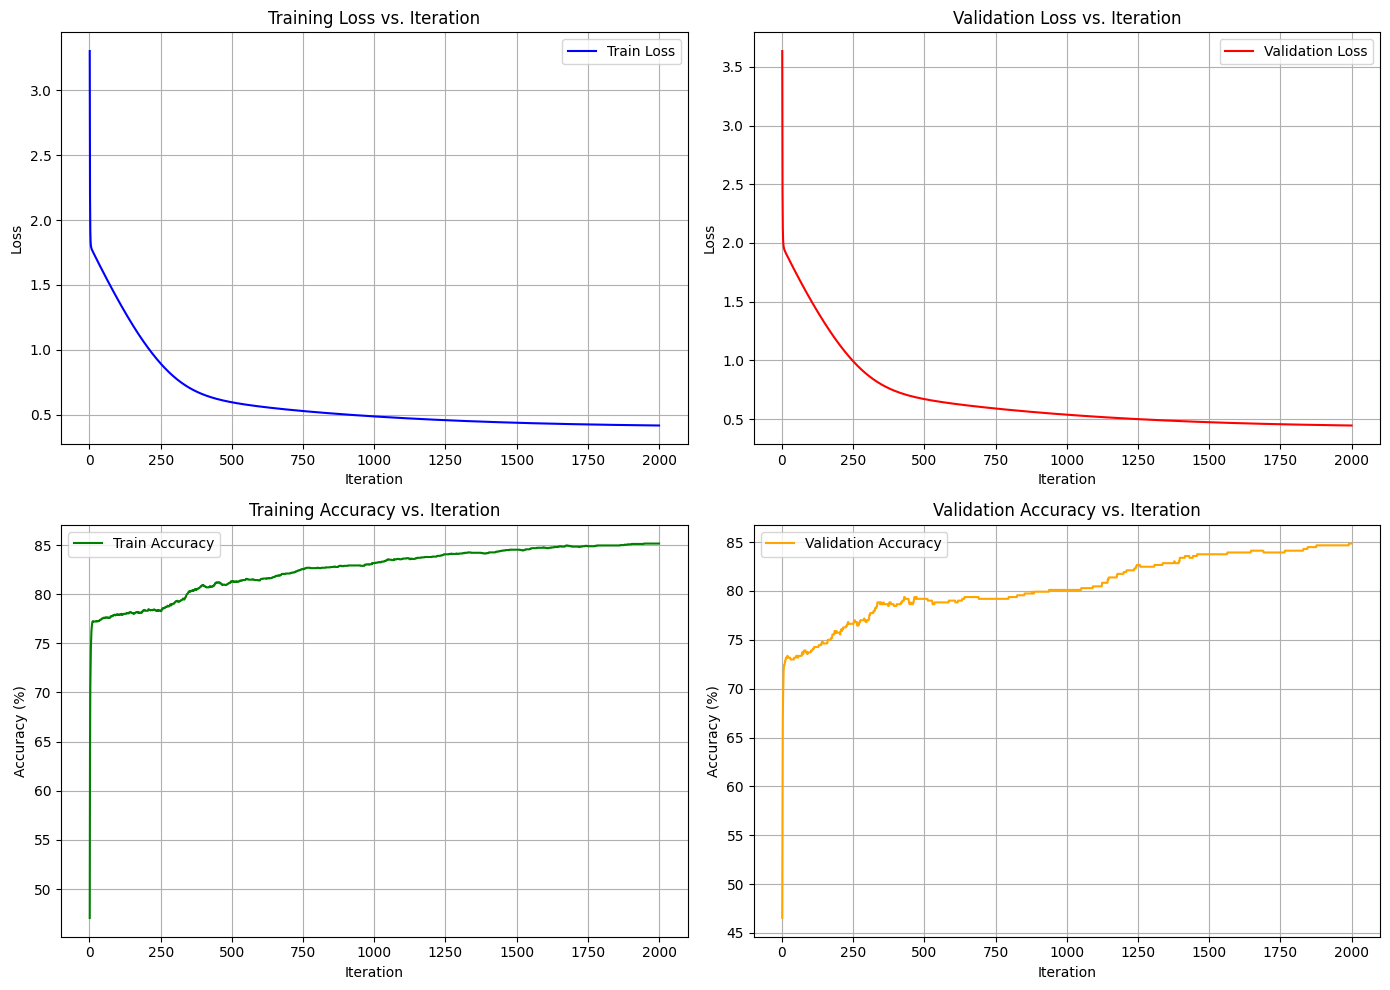

In [8]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses_no_scale) + 1) 

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses_no_scale, label='Train Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, val_losses_no_scale, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iteration')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracies_no_scale, label='Train Accuracy', color='green')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs. Iteration')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracies_no_scale, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy vs. Iteration')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Epoch 0, Train Loss: 0.6263, Train Accuracy: 85.03%, Val Loss: 0.6285, Val Accuracy: 84.31%
Epoch 50, Train Loss: 0.4470, Train Accuracy: 85.03%, Val Loss: 0.4535, Val Accuracy: 84.31%
Epoch 100, Train Loss: 0.4357, Train Accuracy: 85.03%, Val Loss: 0.4423, Val Accuracy: 84.31%
Epoch 150, Train Loss: 0.4284, Train Accuracy: 85.03%, Val Loss: 0.4351, Val Accuracy: 84.31%
Epoch 200, Train Loss: 0.4226, Train Accuracy: 85.03%, Val Loss: 0.4294, Val Accuracy: 84.31%
Epoch 250, Train Loss: 0.4179, Train Accuracy: 85.03%, Val Loss: 0.4249, Val Accuracy: 84.31%
Epoch 300, Train Loss: 0.4141, Train Accuracy: 85.03%, Val Loss: 0.4212, Val Accuracy: 84.31%
Epoch 350, Train Loss: 0.4109, Train Accuracy: 85.03%, Val Loss: 0.4182, Val Accuracy: 84.31%
Epoch 400, Train Loss: 0.4082, Train Accuracy: 85.03%, Val Loss: 0.4157, Val Accuracy: 84.31%
Epoch 450, Train Loss: 0.4059, Train Accuracy: 85.03%, Val Loss: 0.4137, Val Accuracy: 84.31%
Epoch 500, Train Loss: 0.4039, Train Accuracy: 85.03%, Val Loss

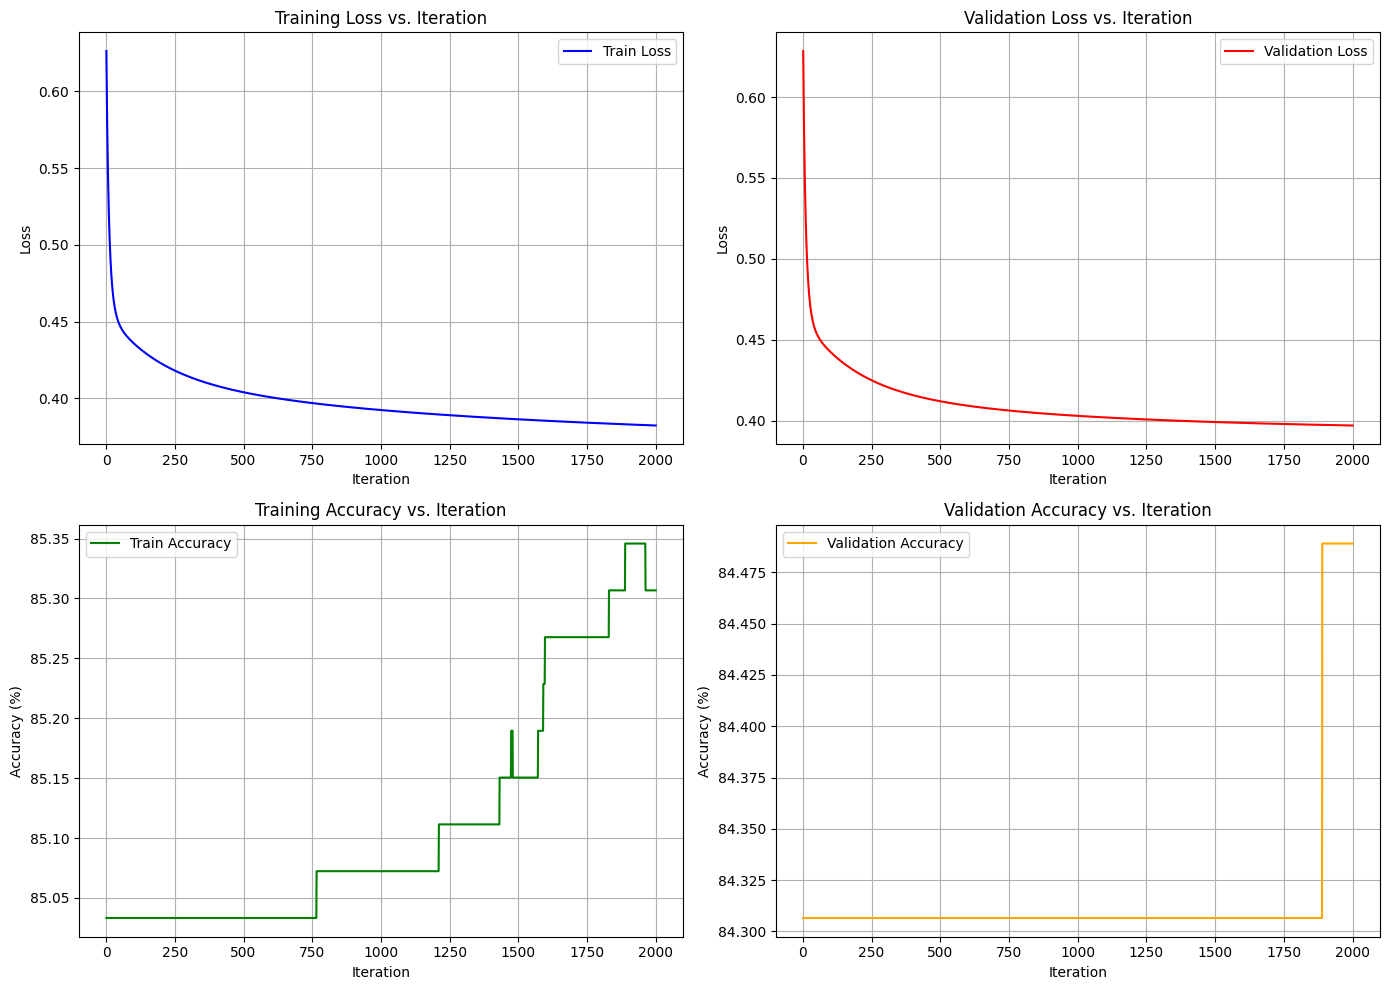

In [35]:
import matplotlib.pyplot as plt

# w scaling
X_train_scaled = min_max_scaling(X_train)
X_val_scaled = min_max_scaling(X_val)
w_scale, b_scale, train_losses_scale,val_losses_scale,train_accuracies_scale, val_accuracies_scale = logistic_regression_batch_gradient_descent(X_train_scaled, y_train,X_val_scaled,y_val,0.1,2000)


epochs = range(1, len(train_losses_scale) + 1) 

plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses_scale, label='Train Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs. Iteration')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, val_losses_scale, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Validation Loss vs. Iteration')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracies_scale, label='Train Accuracy', color='green')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs. Iteration')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracies_scale, label='Validation Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy vs. Iteration')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(X_val, y_val, w, b):
    z_val = np.dot(X_val, w) + b
    p_val = sigmoid(z_val)
    y_pred_val = (p_val > 0.5).astype(int)

    cm = confusion_matrix(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    roc_auc = roc_auc_score(y_val, p_val)

    return cm, precision, recall, f1, roc_auc

def predict(X, w, b):
    z = np.dot(X, w) + b
    p = sigmoid(z)
    return (p > 0.5).astype(int)

# print metrics
cm, precision, recall, f1, roc_auc = evaluate_model(X_val, y_val, w_no_scale, b_no_scale)
print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

Confusion Matrix:
[[455   7]
 [ 76  10]]
Precision: 0.5882
Recall: 0.1163
F1 Score: 0.1942
ROC-AUC Score: 0.5592


In [11]:
def logistic_regression_sgd(X_train, y_train, X_val, y_val, learning_rate=0.000001, epochs=2000, batch_size=1):
    m, n = X_train.shape
    w = np.ones(n)
    b = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_train_shuffled = X_train.iloc[indices].values
        y_train_shuffled = y_train.iloc[indices].values

        for i in range(0, m, batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]

            z_batch = np.dot(X_batch, w) + b
            p_batch = sigmoid(z_batch.flatten())

            # gradients
            dw, db = gradients(X_batch, y_batch, p_batch)

            # update
            w -= learning_rate * dw.reshape(w.shape)
            b -= learning_rate * db

        z_train_full = np.dot(X_train.values, w) + b
        p_train_full = sigmoid(z_train_full.flatten())
        z_val = np.dot(X_val.values, w) + b
        p_val = sigmoid(z_val.flatten())
        
        # loss
        train_loss = loss(y_train.values, p_train_full)
        val_loss = loss(y_val.values, p_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # accuracy
        train_accuracy = np.mean((p_train_full > 0.5).astype(int) == y_train.values) * 100
        val_accuracy = np.mean((p_val > 0.5).astype(int) == y_val.values) * 100
        train_accuracies.append(train_accuracy) 
        val_accuracies.append(val_accuracy)
        
        if epoch % 50 == 0 or epoch == epochs - 1:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    return w, b, train_losses, val_losses, train_accuracies, val_accuracies


Epoch 0, Train Loss: 29.3694, Train Accuracy: 14.97%, Val Loss: 29.1185, Val Accuracy: 15.69%
Epoch 50, Train Loss: 3.5994, Train Accuracy: 75.03%, Val Loss: 3.7682, Val Accuracy: 77.37%
Epoch 100, Train Loss: 1.9982, Train Accuracy: 74.13%, Val Loss: 2.2594, Val Accuracy: 74.82%
Epoch 150, Train Loss: 1.2740, Train Accuracy: 76.32%, Val Loss: 1.5127, Val Accuracy: 75.91%
Epoch 200, Train Loss: 0.9576, Train Accuracy: 77.76%, Val Loss: 1.1566, Val Accuracy: 76.28%
Epoch 250, Train Loss: 0.7706, Train Accuracy: 76.32%, Val Loss: 0.9135, Val Accuracy: 73.18%
Epoch 300, Train Loss: 0.6478, Train Accuracy: 79.02%, Val Loss: 0.7706, Val Accuracy: 75.91%
Epoch 350, Train Loss: 0.5904, Train Accuracy: 81.83%, Val Loss: 0.6995, Val Accuracy: 79.01%
Epoch 400, Train Loss: 0.5419, Train Accuracy: 81.24%, Val Loss: 0.6302, Val Accuracy: 78.10%
Epoch 450, Train Loss: 0.5221, Train Accuracy: 79.33%, Val Loss: 0.5939, Val Accuracy: 77.55%
Epoch 500, Train Loss: 0.5026, Train Accuracy: 82.02%, Val Lo

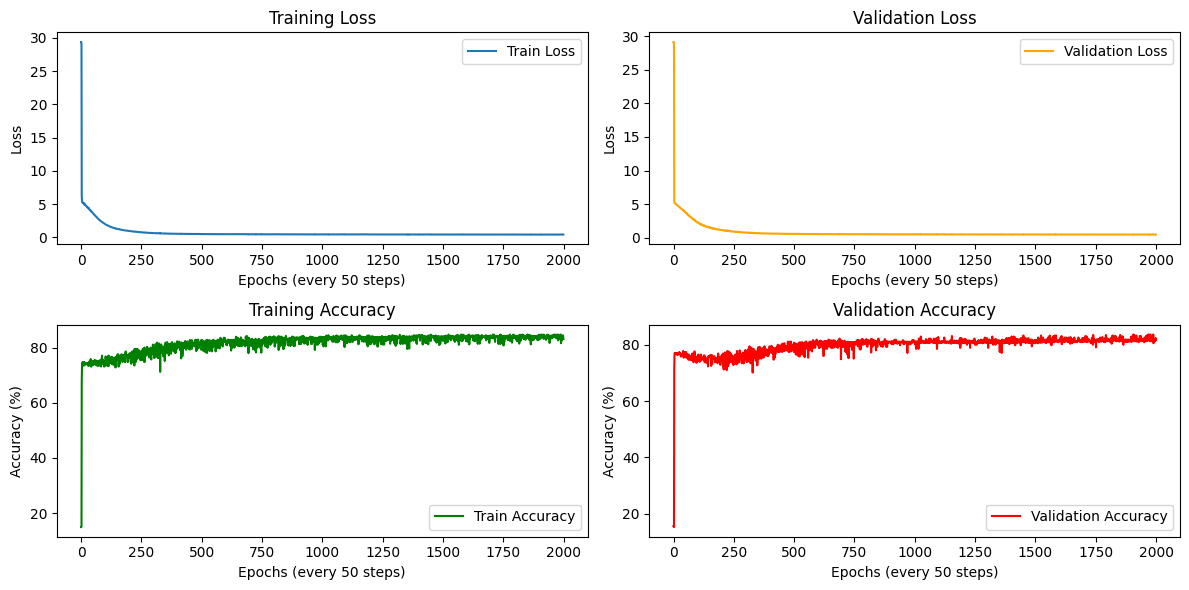

In [12]:
# Using SGD
w_sgd, b_sgd, train_losses_sgd, val_losses_sgd, train_accuracies_sgd, val_accuracies_sgd = logistic_regression_sgd(X_train, y_train, X_val, y_val)

cm, precision, recall, f1, roc_auc = evaluate_model(X_val, y_val, w_sgd, b_sgd)
print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(train_losses_sgd, label='Train Loss')
plt.xlabel('Epochs (every 50 steps)')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(val_losses_sgd, label='Validation Loss', color='orange')
plt.xlabel('Epochs (every 50 steps)')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(train_accuracies_sgd, label='Train Accuracy', color='green')
plt.xlabel('Epochs (every 50 steps)')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(val_accuracies_sgd, label='Validation Accuracy', color='red')
plt.xlabel('Epochs (every 50 steps)')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()

plt.show()

In [13]:
def logistic_regression_minibatch(X_train, y_train, X_val, y_val, learning_rate, epochs, batch_size):
    m, n = X_train.shape
    np.random.seed(420)
    w = np.random.randn(n, 1) * 0.1
    b = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        # shuffle
        indices = np.random.permutation(m)
        X_train_shuffled = X_train.iloc[indices].values  
        y_train_shuffled = y_train.iloc[indices].values  

        for i in range(0, m, batch_size):
            # batches
            X_batch = X_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]

            z_batch = np.dot(X_batch, w) + b
            p_batch = sigmoid(z_batch.flatten())

            dw, db = gradients(X_batch, y_batch, p_batch)

            w -= learning_rate * dw.reshape(w.shape)
            b -= learning_rate * db

        z_train_full = np.dot(X_train.values, w) + b
        p_train_full = sigmoid(z_train_full.flatten())
        z_val = np.dot(X_val.values, w) + b
        p_val = sigmoid(z_val.flatten())
        
        # loss
        train_loss = loss(y_train.values, p_train_full)
        val_loss = loss(y_val.values, p_val)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # accuracy
        train_accuracy = np.mean((p_train_full > 0.5).astype(int) == y_train.values) * 100
        val_accuracy = np.mean((p_val > 0.5).astype(int) == y_val.values) * 100
        train_accuracies.append(train_accuracy) 
        val_accuracies.append(val_accuracy)
        
        if epoch % 50 == 0 or epoch == epochs - 1:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    return w, b, train_losses, val_losses, train_accuracies, val_accuracies


Epoch 0, Train Loss: 1.4862, Train Accuracy: 79.68%, Val Loss: 1.6136, Val Accuracy: 77.74%
Epoch 50, Train Loss: 0.4189, Train Accuracy: 85.11%, Val Loss: 0.4492, Val Accuracy: 84.31%
Epoch 100, Train Loss: 0.4116, Train Accuracy: 84.96%, Val Loss: 0.4373, Val Accuracy: 84.67%
Epoch 150, Train Loss: 0.4024, Train Accuracy: 85.07%, Val Loss: 0.4310, Val Accuracy: 84.85%
Epoch 200, Train Loss: 0.4636, Train Accuracy: 85.03%, Val Loss: 0.5013, Val Accuracy: 84.31%
Epoch 250, Train Loss: 0.4199, Train Accuracy: 85.07%, Val Loss: 0.4530, Val Accuracy: 84.12%
Epoch 300, Train Loss: 0.4184, Train Accuracy: 85.15%, Val Loss: 0.4504, Val Accuracy: 84.12%
Epoch 350, Train Loss: 0.4018, Train Accuracy: 85.15%, Val Loss: 0.4295, Val Accuracy: 84.67%
Epoch 400, Train Loss: 0.4134, Train Accuracy: 85.19%, Val Loss: 0.4444, Val Accuracy: 84.12%
Epoch 450, Train Loss: 0.4823, Train Accuracy: 80.62%, Val Loss: 0.5051, Val Accuracy: 80.29%
Epoch 500, Train Loss: 0.4113, Train Accuracy: 85.19%, Val Loss

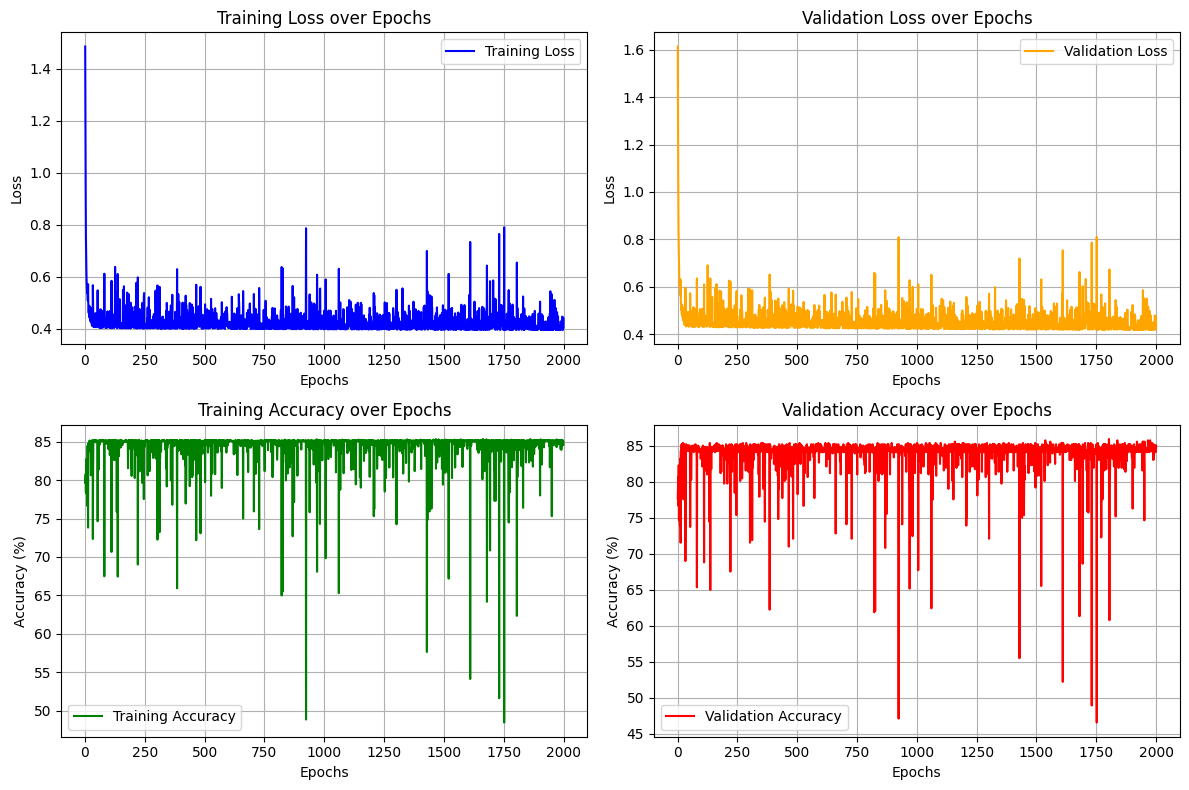

In [14]:
w_minibatch_32, b_minibatch_32, train_losses_minibatch_32, val_losses_minibatch_32, train_accuracies_minibatch_32, val_accuracies_minibatch_32 = logistic_regression_minibatch(X_train, y_train, X_val, y_val, 0.0001, 2000, 32)

cm, precision, recall, f1, roc_auc = evaluate_model(X_val, y_val, w_minibatch_32, b_minibatch_32)
print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

epochs = range(1, len(train_losses_minibatch_32) + 1)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses_minibatch_32, label='Training Loss', color='blue')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, val_losses_minibatch_32, label='Validation Loss', color='orange')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracies_minibatch_32, label='Training Accuracy', color='green')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracies_minibatch_32, label='Validation Accuracy', color='red')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Epoch 0, Train Loss: 1.6363, Train Accuracy: 78.59%, Val Loss: 1.7826, Val Accuracy: 75.55%
Epoch 50, Train Loss: 0.4310, Train Accuracy: 85.11%, Val Loss: 0.4599, Val Accuracy: 85.04%
Epoch 100, Train Loss: 0.4053, Train Accuracy: 85.11%, Val Loss: 0.4306, Val Accuracy: 85.04%
Epoch 150, Train Loss: 0.4028, Train Accuracy: 85.03%, Val Loss: 0.4304, Val Accuracy: 84.85%
Epoch 200, Train Loss: 0.4097, Train Accuracy: 85.15%, Val Loss: 0.4398, Val Accuracy: 84.31%
Epoch 250, Train Loss: 0.4119, Train Accuracy: 85.19%, Val Loss: 0.4429, Val Accuracy: 84.12%
Epoch 300, Train Loss: 0.4291, Train Accuracy: 84.13%, Val Loss: 0.4535, Val Accuracy: 83.39%
Epoch 350, Train Loss: 0.4093, Train Accuracy: 85.19%, Val Loss: 0.4396, Val Accuracy: 84.12%
Epoch 400, Train Loss: 0.4248, Train Accuracy: 85.07%, Val Loss: 0.4575, Val Accuracy: 84.12%
Epoch 450, Train Loss: 0.4328, Train Accuracy: 83.90%, Val Loss: 0.4570, Val Accuracy: 83.21%
Epoch 500, Train Loss: 0.4140, Train Accuracy: 85.19%, Val Loss

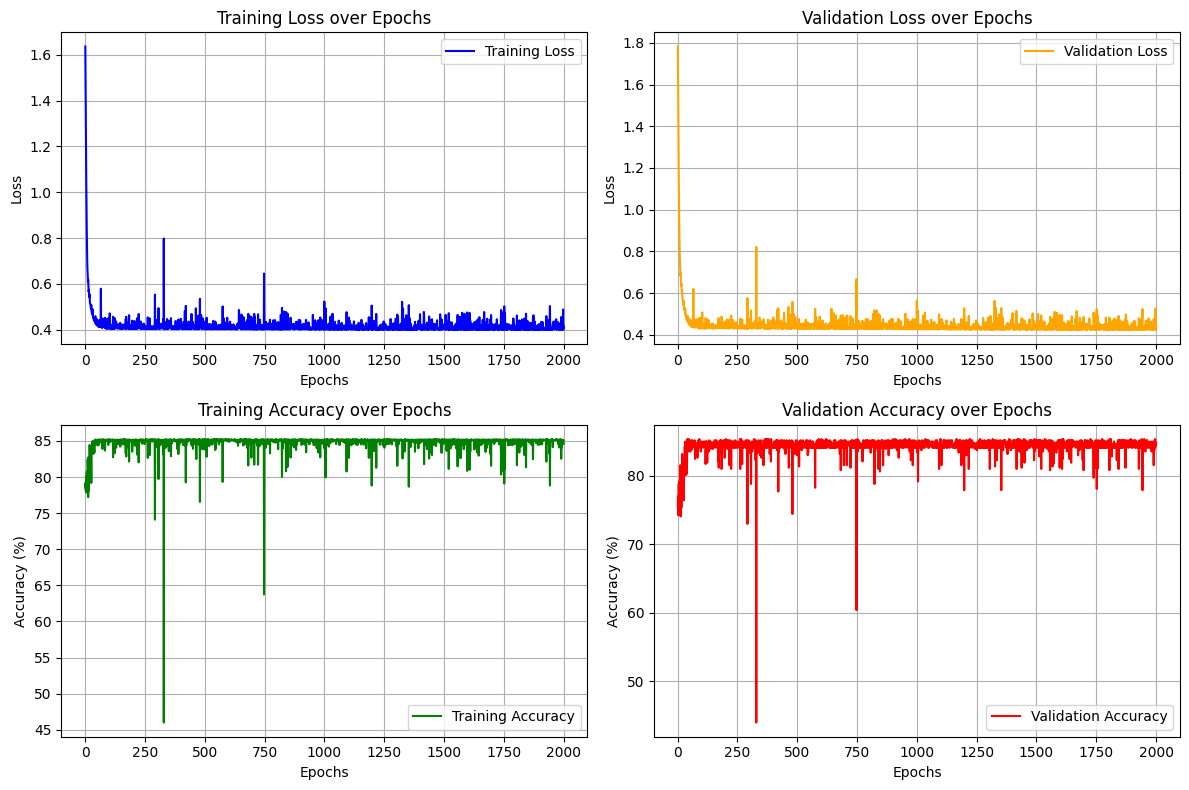

In [15]:
w_minibatch_64, b_minibatch_64, train_losses_minibatch_64, val_losses_minibatch_64, train_accuracies_minibatch_64, val_accuracies_minibatch_64 = logistic_regression_minibatch(X_train, y_train, X_val, y_val, 0.0001, 2000, 64)

cm, precision, recall, f1, roc_auc = evaluate_model(X_val, y_val, w_minibatch_64, b_minibatch_64)
print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

epochs = range(1, len(train_losses_minibatch_64) + 1)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, train_losses_minibatch_64, label='Training Loss', color='blue')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, val_losses_minibatch_64, label='Validation Loss', color='orange')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, train_accuracies_minibatch_64, label='Training Accuracy', color='green')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, val_accuracies_minibatch_64, label='Validation Accuracy', color='red')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import KFold

def k_fold_cross_validation(X, y, k, learning_rate, epochs):
    kf = KFold(n_splits=k)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_index, val_index in kf.split(X):
        X_train_k, X_val_k = X.iloc[train_index], X.iloc[val_index]
        y_train_k, y_val_k = y.iloc[train_index], y.iloc[val_index]
        
        w, b, _, _, _, _ = logistic_regression_batch_gradient_descent(X_train_k, y_train_k, X_val_k, y_val_k, learning_rate, epochs)
        
        y_pred_val = (sigmoid(np.dot(X_val_k, w) + b) > 0.5).astype(int)

      
        y_pred_val = y_pred_val.flatten()
        y_val_k = y_val_k.values.flatten()  

        precision = precision_score(y_val_k, y_pred_val)
        recall = recall_score(y_val_k, y_pred_val)
        f1 = f1_score(y_val_k, y_pred_val)
        
        accuracies.append(np.mean(y_pred_val == y_val_k) * 100)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # average metrics
    print(f'Average Accuracy: {np.mean(accuracies):.2f}% ± {np.std(accuracies):.2f}')
    print(f'Average Precision: {np.mean(precisions):.2f} ± {np.std(precisions):.2f}')
    print(f'Average Recall: {np.mean(recalls):.2f} ± {np.std(recalls):.2f}')
    print(f'Average F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}')


In [17]:
k_fold_cross_validation(X,y,5,0.0001,10000)

Epoch 0, Train Loss: 3.3857, Train Accuracy: 46.79%, Val Loss: 3.2135, Val Accuracy: 48.91%
Epoch 50, Train Loss: 1.6156, Train Accuracy: 77.02%, Val Loss: 1.6851, Val Accuracy: 76.50%
Epoch 100, Train Loss: 1.4116, Train Accuracy: 77.43%, Val Loss: 1.4667, Val Accuracy: 76.37%
Epoch 150, Train Loss: 1.2261, Train Accuracy: 77.63%, Val Loss: 1.2674, Val Accuracy: 76.78%
Epoch 200, Train Loss: 1.0627, Train Accuracy: 77.74%, Val Loss: 1.0923, Val Accuracy: 77.46%
Epoch 250, Train Loss: 0.9244, Train Accuracy: 78.18%, Val Loss: 0.9454, Val Accuracy: 77.32%
Epoch 300, Train Loss: 0.8138, Train Accuracy: 79.27%, Val Loss: 0.8299, Val Accuracy: 76.91%
Epoch 350, Train Loss: 0.7317, Train Accuracy: 80.27%, Val Loss: 0.7462, Val Accuracy: 77.73%
Epoch 400, Train Loss: 0.6744, Train Accuracy: 80.78%, Val Loss: 0.6899, Val Accuracy: 78.28%
Epoch 450, Train Loss: 0.6355, Train Accuracy: 81.16%, Val Loss: 0.6538, Val Accuracy: 78.69%
Epoch 500, Train Loss: 0.6081, Train Accuracy: 81.53%, Val Loss


Training with batch gradient descent
Epoch 0, Train Loss: 1.3936, Train Accuracy: 79.68%, Val Loss: 1.4904, Val Accuracy: 77.74%
Epoch 50, Train Loss: 0.4189, Train Accuracy: 85.11%, Val Loss: 0.4492, Val Accuracy: 84.31%
Epoch 100, Train Loss: 0.4116, Train Accuracy: 84.96%, Val Loss: 0.4373, Val Accuracy: 84.67%
Epoch 150, Train Loss: 0.4024, Train Accuracy: 85.07%, Val Loss: 0.4310, Val Accuracy: 84.85%
Epoch 200, Train Loss: 0.4636, Train Accuracy: 85.03%, Val Loss: 0.5013, Val Accuracy: 84.31%
Epoch 250, Train Loss: 0.4199, Train Accuracy: 85.07%, Val Loss: 0.4530, Val Accuracy: 84.12%
Epoch 300, Train Loss: 0.4184, Train Accuracy: 85.15%, Val Loss: 0.4504, Val Accuracy: 84.12%
Epoch 350, Train Loss: 0.4018, Train Accuracy: 85.15%, Val Loss: 0.4295, Val Accuracy: 84.67%
Epoch 400, Train Loss: 0.4134, Train Accuracy: 85.19%, Val Loss: 0.4444, Val Accuracy: 84.12%
Epoch 450, Train Loss: 0.4823, Train Accuracy: 80.62%, Val Loss: 0.5051, Val Accuracy: 80.29%
Epoch 500, Train Loss: 0.

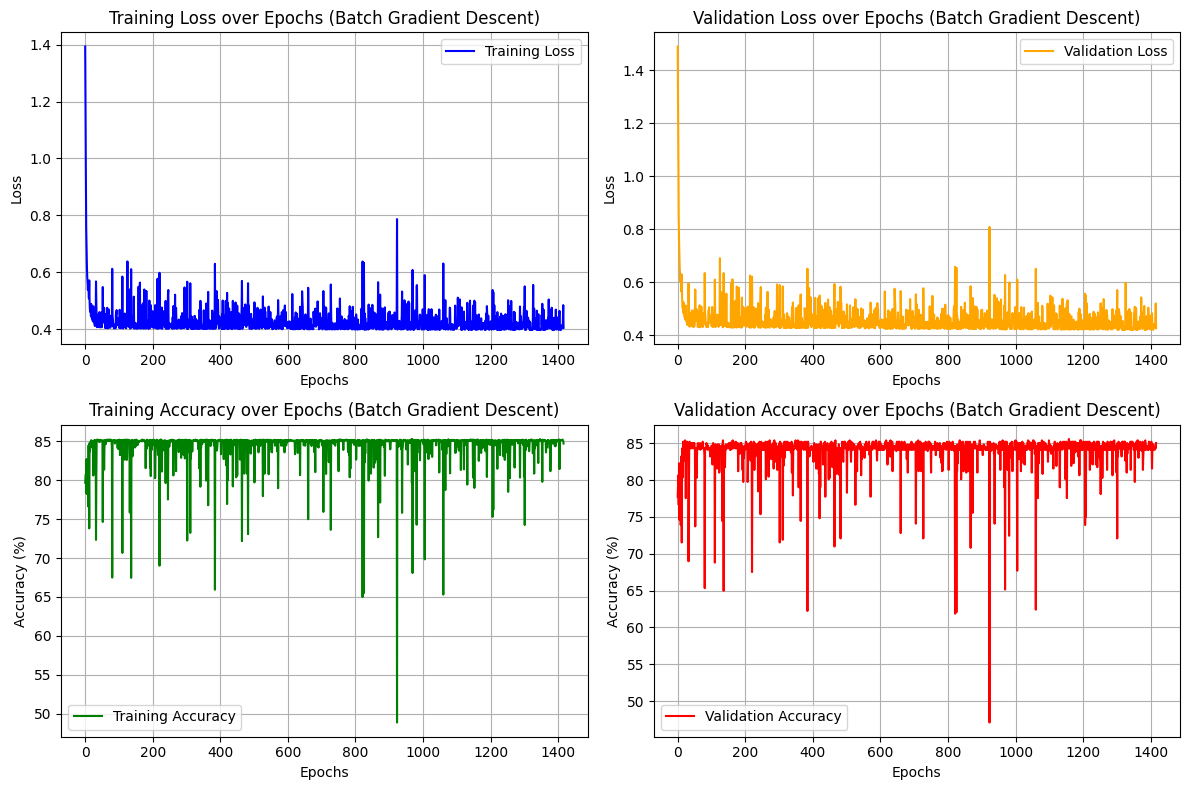

In [26]:
def loss_reg(y, p, w, alpha_l1, alpha_l2):
    m = len(y)
    noise = 0.000001
    log_loss = (-1/m) * np.sum(y * np.log(p + noise) + (1 - y) * np.log(1 - p  + noise))
    l1_term = alpha_l1 * np.sum(np.abs(w)) / m
    l2_term = alpha_l2 * np.sum(np.square(w)) / (2*m)
    return log_loss + l1_term + l2_term

def logistic_regression_minibatch_early(X_train, y_train, X_val, y_val, learning_rate, epochs, patience, alpha_l1, alpha_l2, batch_size):
    m, n = X_train.shape
    np.random.seed(420)
    w = np.random.randn(n, 1) * 0.1
    b = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(m)
        X_train_shuffled = X_train.iloc[indices].values  
        y_train_shuffled = y_train.iloc[indices].values  

        for i in range(0, m, batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]

            z_batch = np.dot(X_batch, w) + b
            p_batch = sigmoid(z_batch.flatten())

            # gradients
            dw, db = gradients(X_batch, y_batch, p_batch)

            # update 
            w -= learning_rate * dw.reshape(w.shape)
            b -= learning_rate * db

        # loss
        z_train_full = np.dot(X_train.values, w) + b
        p_train_full = sigmoid(z_train_full.flatten())
        z_val = np.dot(X_val.values, w) + b
        p_val = sigmoid(z_val.flatten())
        
        train_loss = loss_reg(y_train.values, p_train_full, w, alpha_l1, alpha_l2)
        val_loss = loss_reg(y_val.values, p_val, w, alpha_l1, alpha_l2)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # accuracy
        train_accuracy = np.mean((p_train_full > 0.5).astype(int) == y_train.values) * 100
        val_accuracy = np.mean((p_val > 0.5).astype(int) == y_val.values) * 100
        train_accuracies.append(train_accuracy) 
        val_accuracies.append(val_accuracy)

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch}')
                break
        
        # print
        if epoch % 50 == 0 or epoch == epochs - 1:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

    return w, b, train_losses, val_losses, train_accuracies, val_accuracies


def run_early_stoppping(X_train, y_train, X_val, y_val, learning_rate, alpha_l1, alpha_l2, batch_size):
    # learning_rate = 0.0001  
    epochs = 2000  
    patience = 100 
    # alpha_l1, alpha_l2 = 0.1, 0.1  

    print(f"\nTraining with batch gradient descent")

    w, b, train_losses, val_losses, train_accuracies, val_accuracies = logistic_regression_minibatch_early(
        X_train, y_train, X_val, y_val, learning_rate=learning_rate, epochs=epochs, patience=patience, alpha_l1=alpha_l1, alpha_l2=alpha_l2, batch_size=batch_size
    )

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss', color='blue')
    plt.title(f'Training Loss over Epochs (Batch Gradient Descent)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(range(len(val_losses)), val_losses, label='Validation Loss', color='orange')
    plt.title(f'Validation Loss over Epochs (Batch Gradient Descent)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy', color='green')
    plt.title(f'Training Accuracy over Epochs (Batch Gradient Descent)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy', color='red')
    plt.title(f'Validation Accuracy over Epochs (Batch Gradient Descent)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


run_early_stoppping(X_train, y_train, X_val, y_val, 0.0001, 0, 0.1, 32)


Training with batch gradient descent
Epoch 0, Train Loss: 1.3936, Train Accuracy: 79.68%, Val Loss: 1.4906, Val Accuracy: 77.74%
Epoch 50, Train Loss: 0.4189, Train Accuracy: 85.11%, Val Loss: 0.4493, Val Accuracy: 84.31%
Epoch 100, Train Loss: 0.4116, Train Accuracy: 84.96%, Val Loss: 0.4374, Val Accuracy: 84.67%
Epoch 150, Train Loss: 0.4024, Train Accuracy: 85.07%, Val Loss: 0.4311, Val Accuracy: 84.85%
Epoch 200, Train Loss: 0.4636, Train Accuracy: 85.03%, Val Loss: 0.5014, Val Accuracy: 84.31%
Epoch 250, Train Loss: 0.4200, Train Accuracy: 85.07%, Val Loss: 0.4531, Val Accuracy: 84.12%
Epoch 300, Train Loss: 0.4184, Train Accuracy: 85.15%, Val Loss: 0.4505, Val Accuracy: 84.12%
Epoch 350, Train Loss: 0.4018, Train Accuracy: 85.15%, Val Loss: 0.4297, Val Accuracy: 84.67%
Epoch 400, Train Loss: 0.4134, Train Accuracy: 85.19%, Val Loss: 0.4445, Val Accuracy: 84.12%
Epoch 450, Train Loss: 0.4823, Train Accuracy: 80.62%, Val Loss: 0.5052, Val Accuracy: 80.29%
Epoch 500, Train Loss: 0.

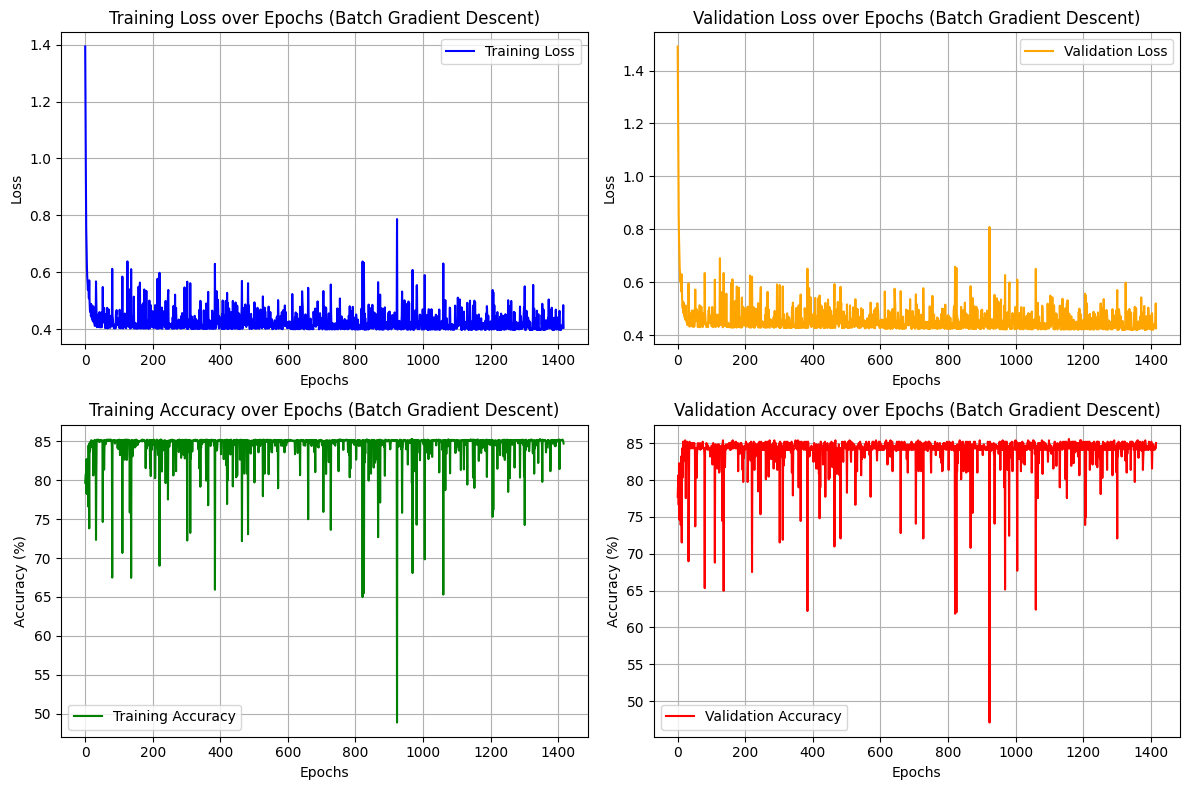

In [27]:
run_early_stoppping(X_train, y_train, X_val, y_val, 0.0001, 0.1, 0,32)


Training with batch gradient descent
Epoch 0, Train Loss: 1.3936, Train Accuracy: 79.68%, Val Loss: 1.4904, Val Accuracy: 77.74%
Epoch 50, Train Loss: 0.4189, Train Accuracy: 85.11%, Val Loss: 0.4492, Val Accuracy: 84.31%
Epoch 100, Train Loss: 0.4116, Train Accuracy: 84.96%, Val Loss: 0.4373, Val Accuracy: 84.67%
Epoch 150, Train Loss: 0.4024, Train Accuracy: 85.07%, Val Loss: 0.4310, Val Accuracy: 84.85%
Epoch 200, Train Loss: 0.4636, Train Accuracy: 85.03%, Val Loss: 0.5013, Val Accuracy: 84.31%
Epoch 250, Train Loss: 0.4199, Train Accuracy: 85.07%, Val Loss: 0.4530, Val Accuracy: 84.12%
Epoch 300, Train Loss: 0.4184, Train Accuracy: 85.15%, Val Loss: 0.4504, Val Accuracy: 84.12%
Epoch 350, Train Loss: 0.4018, Train Accuracy: 85.15%, Val Loss: 0.4295, Val Accuracy: 84.67%
Epoch 400, Train Loss: 0.4134, Train Accuracy: 85.19%, Val Loss: 0.4444, Val Accuracy: 84.12%
Epoch 450, Train Loss: 0.4823, Train Accuracy: 80.62%, Val Loss: 0.5051, Val Accuracy: 80.29%
Epoch 500, Train Loss: 0.

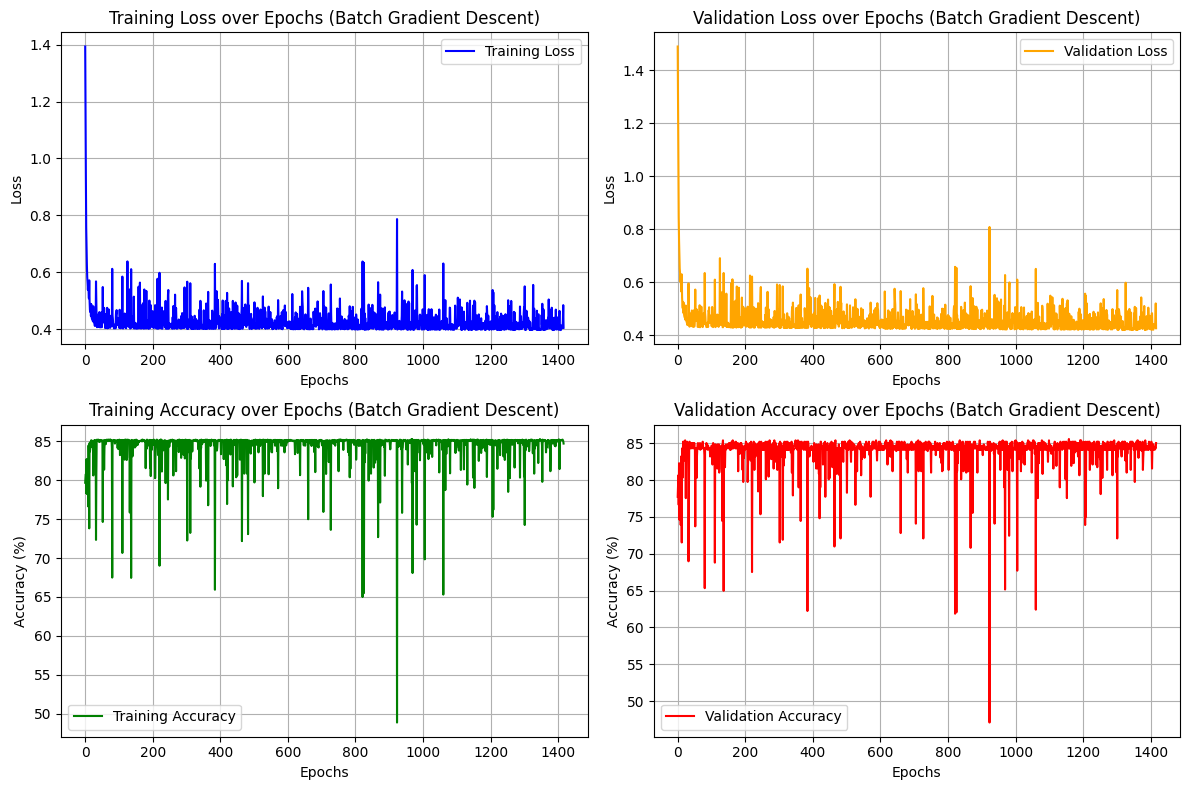

In [28]:
run_early_stoppping(X_train, y_train, X_val, y_val, 0.0001, 0.01, 0, 32)


Training with batch gradient descent
Epoch 0, Train Loss: 1.3936, Train Accuracy: 79.68%, Val Loss: 1.4904, Val Accuracy: 77.74%
Epoch 50, Train Loss: 0.4189, Train Accuracy: 85.11%, Val Loss: 0.4492, Val Accuracy: 84.31%
Epoch 100, Train Loss: 0.4116, Train Accuracy: 84.96%, Val Loss: 0.4373, Val Accuracy: 84.67%
Epoch 150, Train Loss: 0.4024, Train Accuracy: 85.07%, Val Loss: 0.4310, Val Accuracy: 84.85%
Epoch 200, Train Loss: 0.4636, Train Accuracy: 85.03%, Val Loss: 0.5013, Val Accuracy: 84.31%
Epoch 250, Train Loss: 0.4199, Train Accuracy: 85.07%, Val Loss: 0.4530, Val Accuracy: 84.12%
Epoch 300, Train Loss: 0.4184, Train Accuracy: 85.15%, Val Loss: 0.4504, Val Accuracy: 84.12%
Epoch 350, Train Loss: 0.4018, Train Accuracy: 85.15%, Val Loss: 0.4295, Val Accuracy: 84.67%
Epoch 400, Train Loss: 0.4134, Train Accuracy: 85.19%, Val Loss: 0.4444, Val Accuracy: 84.12%
Epoch 450, Train Loss: 0.4823, Train Accuracy: 80.62%, Val Loss: 0.5051, Val Accuracy: 80.29%
Epoch 500, Train Loss: 0.

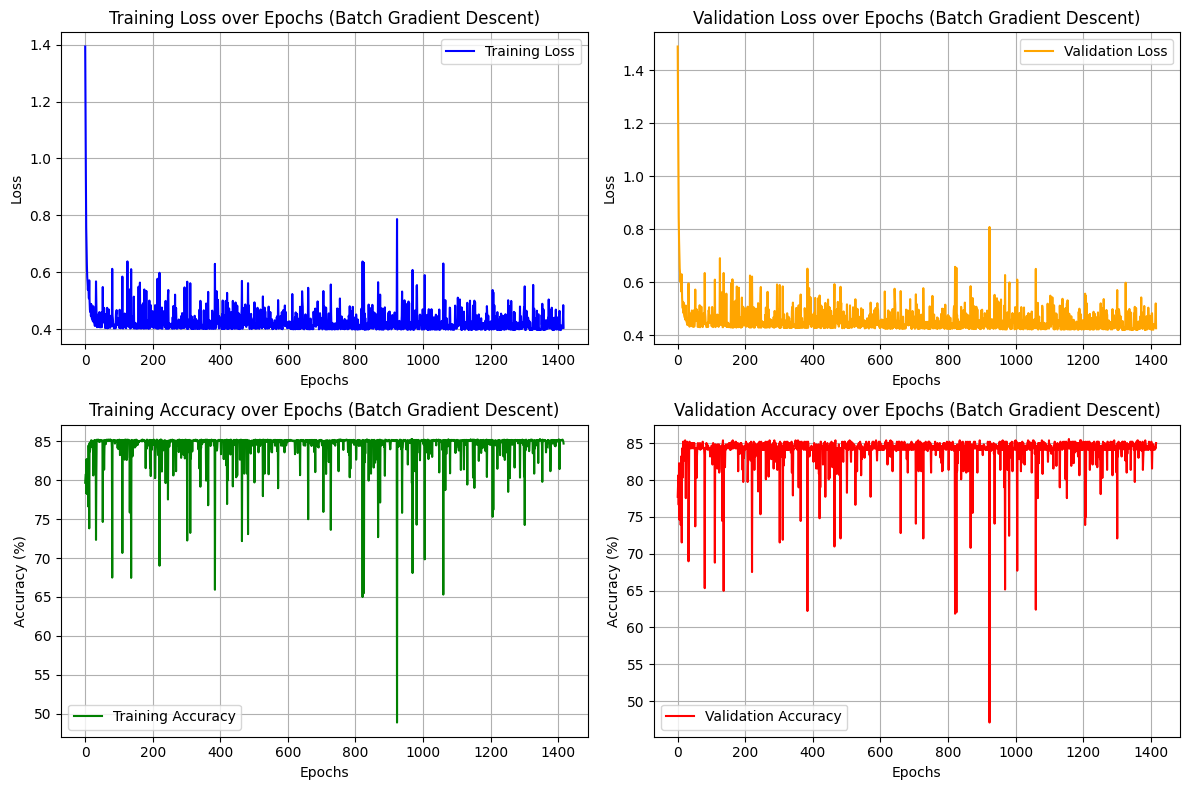

In [29]:
run_early_stoppping(X_train, y_train, X_val, y_val, 0.0001, 0, 0.01,32)


Training with batch gradient descent
Epoch 0, Train Loss: 1.2188, Train Accuracy: 85.11%, Val Loss: 1.3046, Val Accuracy: 85.04%
Epoch 50, Train Loss: 0.7665, Train Accuracy: 85.19%, Val Loss: 0.8506, Val Accuracy: 84.67%
Epoch 100, Train Loss: 1.9471, Train Accuracy: 85.03%, Val Loss: 2.0644, Val Accuracy: 84.31%
Early stopping at epoch 113


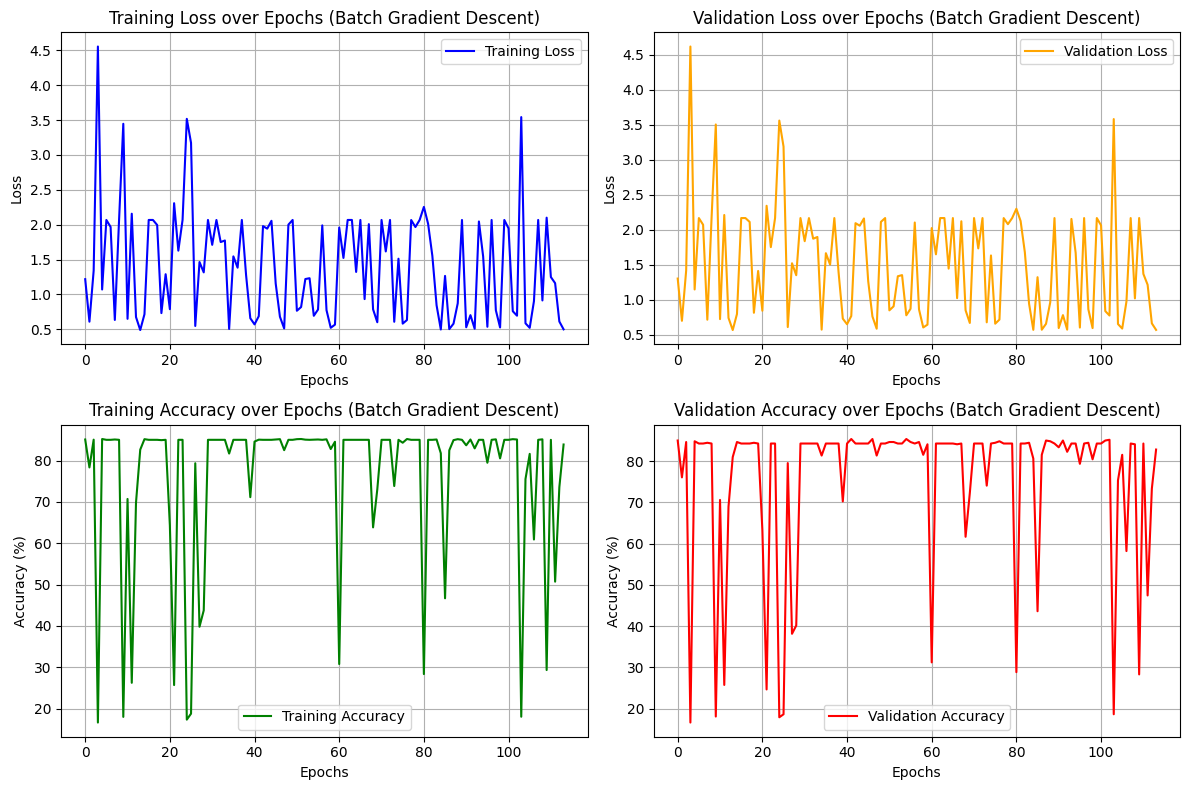

In [30]:
run_early_stoppping(X_train, y_train, X_val, y_val, 0.0005, 0.1, 0, 32)


Training with batch gradient descent
Epoch 0, Train Loss: 1.2188, Train Accuracy: 85.11%, Val Loss: 1.3044, Val Accuracy: 85.04%
Epoch 50, Train Loss: 0.7664, Train Accuracy: 85.19%, Val Loss: 0.8504, Val Accuracy: 84.67%
Epoch 100, Train Loss: 1.9471, Train Accuracy: 85.03%, Val Loss: 2.0642, Val Accuracy: 84.31%
Early stopping at epoch 113


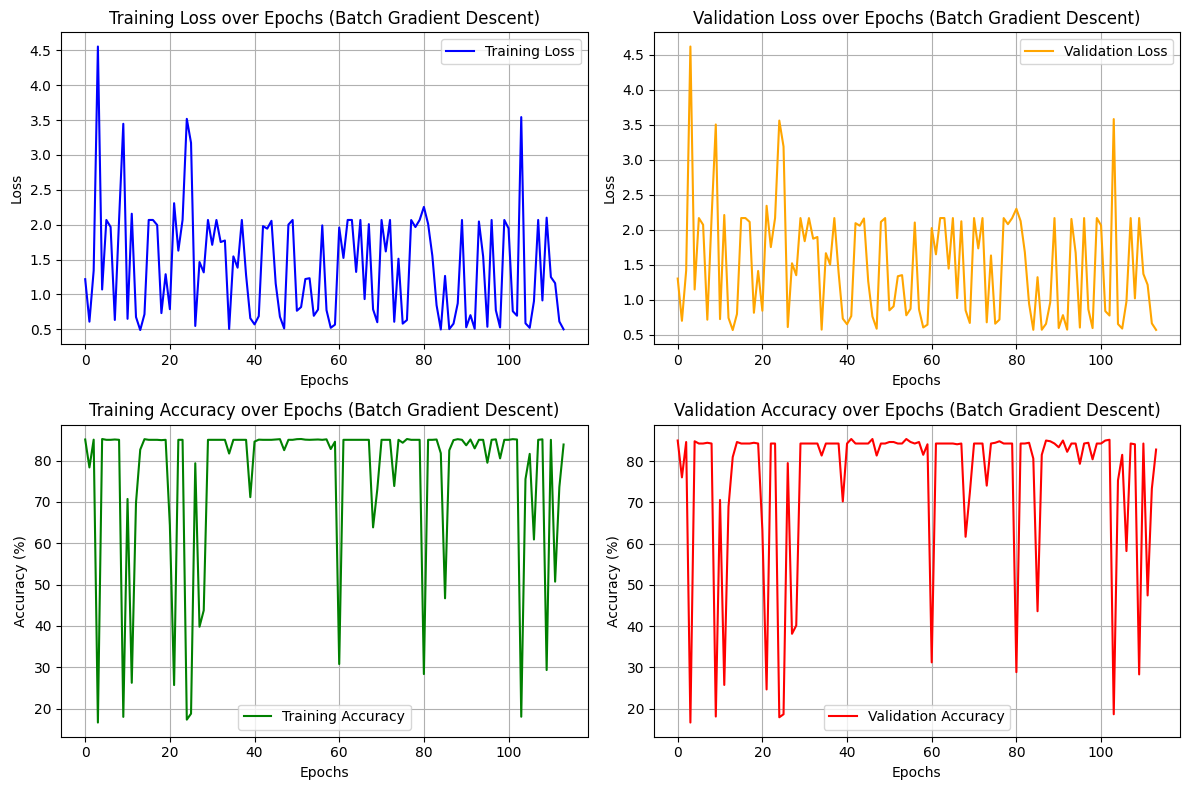

In [31]:
run_early_stoppping(X_train, y_train, X_val, y_val, 0.0005, 0, 0.1,32)


Training with batch gradient descent
Epoch 0, Train Loss: 1.2188, Train Accuracy: 85.11%, Val Loss: 1.3044, Val Accuracy: 85.04%
Epoch 50, Train Loss: 0.7664, Train Accuracy: 85.19%, Val Loss: 0.8504, Val Accuracy: 84.67%
Epoch 100, Train Loss: 1.9471, Train Accuracy: 85.03%, Val Loss: 2.0642, Val Accuracy: 84.31%
Early stopping at epoch 113


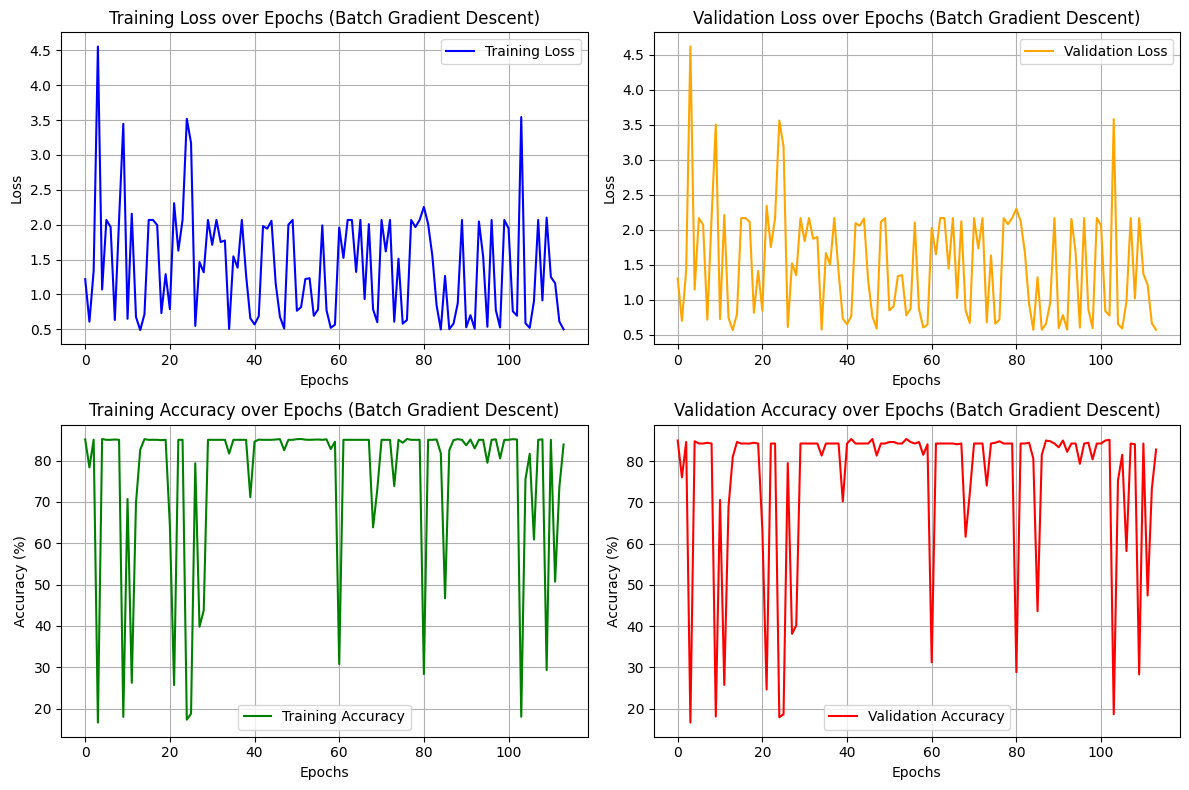

In [32]:
run_early_stoppping(X_train, y_train, X_val, y_val, 0.0005, 0.01, 0, 32)


Training with batch gradient descent
Epoch 0, Train Loss: 1.2188, Train Accuracy: 85.11%, Val Loss: 1.3044, Val Accuracy: 85.04%
Epoch 50, Train Loss: 0.7664, Train Accuracy: 85.19%, Val Loss: 0.8504, Val Accuracy: 84.67%
Epoch 100, Train Loss: 1.9471, Train Accuracy: 85.03%, Val Loss: 2.0642, Val Accuracy: 84.31%
Early stopping at epoch 113


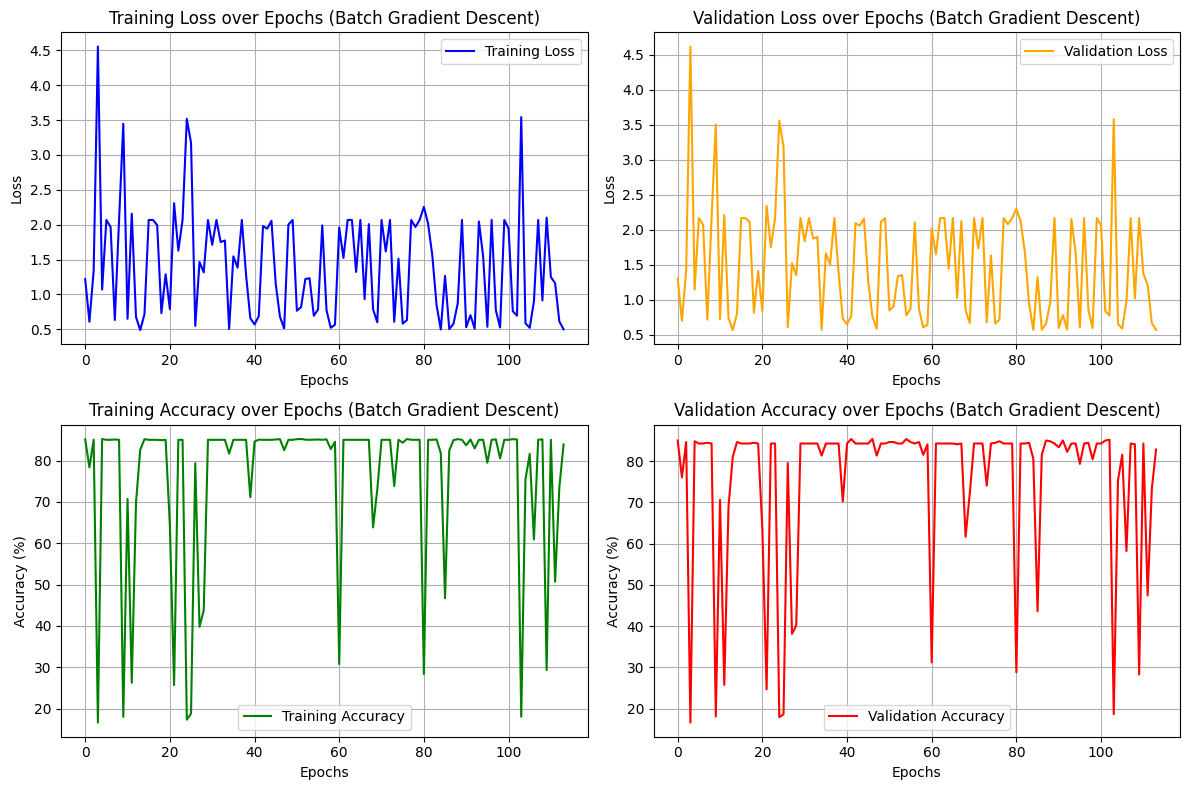

In [33]:
run_early_stoppping(X_train, y_train, X_val, y_val, 0.0005, 0, 0.01, 32)